In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [3]:
RG = pokemon[(pokemon['Class 1']=='Rock') | (pokemon['Class 1']=='Grass')|(pokemon['Class 2']=='Rock') | (pokemon['Class 2']=='Grass')]
RG = RG.drop(RG[(RG['Class 1']=='Rock') & (RG['Class 2']=='Grass')].index) #удаляю покемонов относящихся к обоим классам
RG = RG.drop(RG[(RG['Class 1']=='Grass') & (RG['Class 2']=='Rock')].index)
Grass = RG[(RG['Class 1']=='Grass') | (RG['Class 2']=='Grass')]
Rock = RG[(RG['Class 1']=='Rock') | (RG['Class 2']=='Rock')]

<AxesSubplot:xlabel='Attack', ylabel='Count'>

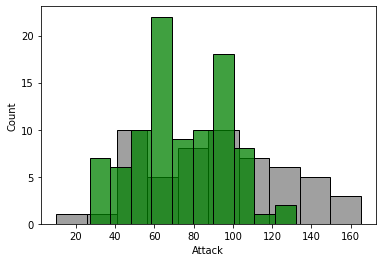

In [4]:
sns.histplot(data = Rock, x='Attack', color = 'grey', bins=10);
sns.histplot(data = Grass, x='Attack', color = 'green', bins=10)

Из графика выше видно, что распределение покемонов rock смещено вправо относительно покемонов grass и ольше походит на нормальное распределение. Давайте посмотрим на другие графики.

<AxesSubplot:xlabel='Attack'>

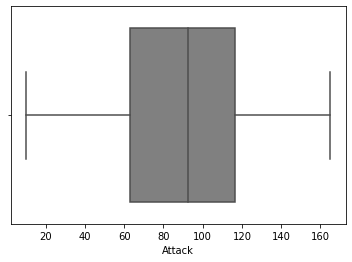

In [5]:
sns.boxplot(data=Rock, x='Attack', color='grey')

<AxesSubplot:xlabel='Attack'>

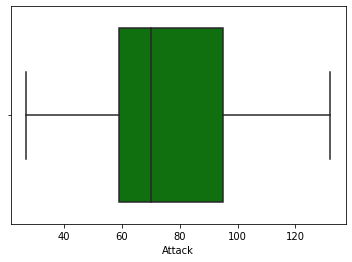

In [6]:
sns.boxplot(data=Grass, x='Attack', color='green')

По данным графикам можно сказать, что средняя атака rock покемонов на много больше чем у grass покемонов, но давайте дакажем это статиститчески. 

In [7]:
fvalue, pvalue = stats.f_oneway( Grass['Attack'], Rock['Attack'])
fvalue, pvalue

(13.908853861099336, 0.00027333381459902556)

Диспервионный анализ говорит о том, что мы можем отвергнуть Н0 (наши выборки равны). А чем больше F значение, тем больше различие в наших выборках

In [8]:
t , p  = stats.ttest_ind(Rock['Attack'], Grass['Attack'])
print("t = " + str(t))
print("p = " + str(p))

t = 3.729457582692065
p = 0.00027333381459902653


t-критейрий Стьюдента дает такие же результаты как и дисперсионный анализ

### Вывод: предположение о том, что атака grass покемонов выше - ошибочно

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [9]:
WN = pokemon[(pokemon['Class 1']=='Water') | (pokemon['Class 1']=='Water')|(pokemon['Class 2']=='Normal') | (pokemon['Class 2']=='Normal')]
WN = WN.drop(WN[(WN['Class 1']=='Water') & (WN['Class 2']=='Normal')].index) #удаляю покемонов относящихся к обоим классам
RG = WN.drop(WN[(WN['Class 1']=='Normal') & (WN['Class 2']=='Water')].index)
Water = WN[(WN['Class 1']=='Water') | (WN['Class 2']=='Water')]
Normal = WN[(WN['Class 1']=='Normal') | (WN['Class 2']=='Normal')]

In [10]:
print(len(Water))
print(len(Normal))

112
4


Выборки очень сильно отличаются по размерам

In [ ]:
sns.histplot(data = Water, x='Speed', color = 'blue', bins=10);
sns.histplot(data = Normal, x='Speed', color = 'red', bins=10)

In [ ]:
sns.boxplot(data=Water, x='Speed', color='blue')

In [ ]:
sns.boxplot(data=Normal, x='Speed', color='red')

Судя по графикам средняя скорость Normal покемонов выше чем у water покемонов

Как и в предыдущем анализе проведем дисперсионный анализ и воспользуемся t-тестом

In [ ]:
fvalue, pvalue = stats.f_oneway( Water['Speed'], Normal['Speed'])
fvalue, pvalue

In [ ]:
t , p  = stats.ttest_ind(Water['Speed'], Normal['Speed'])
print("t = " + str(t))
print("p = " + str(p))

p-value < 5% можно гвоорить об отвержении H0, а так же отрицательное t значение говорит о том, что среднее водяных покемонов меньше, чем среднее нормальных покемомонов

### Вывод: предположение о том, что скорость water покемонов выше - ошибочно

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
treathed_pokemons = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed_pokemons

In [ ]:
normal_pokemons = pokemon[pokemon['Name'].isin(['Beedrill', 'Alakazam', 'Lopunny', 'Deoxys'])]
normal_pokemons
#не понял как найти Deoxys Normal Forme до применения сыворотки

In [ ]:
sns.histplot(data = treathed_pokemons, x='Speed', color = 'blue', bins=4);
sns.histplot(data = normal_pokemons, x='Speed', color = 'red', bins=3)

Сразу же видно, что наши выборки сильно отличаются. Скорость вакцинированных покемонов значительно выше, скорости обычных. Давайте посмотри на t критерий Стьюдента и проверим нашу гипотезу. 

In [ ]:
t, p = stats.ttest_ind(treathed_pokemons['Speed'], normal_pokemons['Speed'])
print('t = ', t)
print('p = ', p)

### Вывод: Большое Т значние говорит о разности наших выборок. p-value < 5%, значит мы можем говорить об отвержении Н0 (различия случайны), а значит наши различия статистически значимы. 


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
legends = pokemon[pokemon['Legendary']== True]
regular = pokemon[pokemon['Legendary']== False]

In [ ]:
legends['sum_'] = legends['HP'] + legends['Attack'] + legends['Defense']
legends['mult'] = legends['HP'] * legends['Attack'] * legends['Defense']
regular['sum_'] = regular['HP'] + regular['Attack'] + regular['Defense']
regular['mult'] = regular['HP'] * regular['Attack'] * regular['Defense']

In [ ]:
sns.histplot(data=regular, x='sum_', bins=10)
sns.histplot(data=legends, x='sum_', color='orange', bins=10)

In [ ]:
t, p = stats.ttest_ind(legends['sum_'], regular['sum_'])
f, p2 = stats.f_oneway(legends['sum_'], regular['sum_'])
print('t = ', t)
print('p = ', p)
print('f = ', f)
print('p2 =', p2)

Большое t и f значение, очень маленькое p-value, следовательно наши различия не случайны и сумма у легендарных покемонов выше, чем у обычных

In [ ]:
sns.histplot(data=regular, x='mult')
sns.histplot(data=legends, x='mult', color='orange')

In [ ]:
t, p = stats.ttest_ind(legends['mult'], regular['sum_'])
f, p2 = stats.f_oneway(legends['mult'], regular['sum_'])
print('t = ', t)
print('p = ', p)
print('f = ', f)
print('p2 =', p2)

Большое t и f значение, очень маленькое p-value, следовательно наши различия не случайны и сумма у легендарных покемонов выше, чем у обычных

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

In [ ]:
Rock = pokemon[(pokemon['Class 1']=='Rock')|(pokemon['Class 2']=='Rock')]
Rock = Rock.drop(Rock[(Rock['Class 1'].isin(['Ground','Steel','Ice']))|(Rock['Class 2'].isin(['Ground','Steel','Ice']))].index)
Ground = pokemon[(pokemon['Class 1']=='Ground')|(pokemon['Class 2']=='Ground')]
Ground = Ground.drop(Ground[(Ground['Class 1'].isin(['Rock','Steel','Ice']))|(Ground['Class 2'].isin(['Rock','Steel','Ice']))].index)
Steel = pokemon[(pokemon['Class 1']=='Steel')|(pokemon['Class 2']=='Steel')]
Steel = Steel.drop(Steel[(Steel['Class 1'].isin(['Rock','Ground','Ice']))|(Steel['Class 2'].isin(['Rock','Ground','Ice']))].index)
Ice = pokemon[(pokemon['Class 1']=='Ice')|(pokemon['Class 2']=='Ice')]
Ice = Ice.drop(Ice[(Ice['Class 1'].isin(['Rock','Ground','Steel']))|(Ice['Class 2'].isin(['Rock','Ground','Steel']))].index)

In [ ]:
print('Rock', len(Rock))
print('Ground', len(Ground))
print('Steel', len(Steel))
print('Ice', len(Ice))

In [ ]:
plt.boxplot([Rock['Defense'], Ground['Defense'], Steel['Defense'], Ice['Defense']])

Для сравнения нескольких групп, воспользуемся дисперсионным анализом

In [ ]:
alpha = 0.05
f, p = stats.f_oneway(Rock['Defense'], Ground['Defense'], Steel['Defense'], Ice['Defense'])
print('f =', f)
print('p =', p)
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

Распределния разные, следовательно мы не можем сказать, что защита всех рассматриваемых групп одинакова. Из графика выше, я бы выделил 1 и 3 график в одну группу и 2 и 4 в другую, так как медианы, а так же 25 и 75 перцентиль находятся очень близко (внутри двух групп)

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [ ]:
sns.histplot(data=B, color='green')
sns.histplot(data=A)

In [ ]:
# Группы независимы - можно использовать t-тест Стьюдента
t, p = stats.ttest_ind(A, B)
print('t=', t)
print('p=', p)

p-value больще 5%, что говорит о том, что выборки отличаются и отличия не случайны

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [ ]:
sns.histplot(data=B, color='green')
sns.histplot(data=A)

In [ ]:
#группы зависимы, используем критерий Уилкосона
stat, p = stats.wilcoxon(A, B)
print('stat=', stat)
print('p=', p)

р-value меньше 5%, распределения различны. Отвергаем Н0

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [ ]:
cucumber_data = pd.DataFrame()
cucumber_data['value'] = water+nutri+mineral
cucumber_data['group'] = ['water']*len(water)+['nutri']*len(nutri)+['mineral']*len(mineral)

In [ ]:
sns.boxplot(data=cucumber_data, x='group', y='value')

In [ ]:
#мы рассматриваем 3 группы, следовательно будем использовать дисперсионный анализ
f, p = stats.f_oneway(water, nutri, mineral)
alpha = 0.05
print('f =', f)
print('p =', p)
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

Судя по графику и результатам дисперсионного анали, различия не случайны и вода и удобрениями, показывает лучший результат, чем остальные варианты

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

In [ ]:
#Ваши выводы
#выборки примерно равны по кол-ву элементов

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**  
Вариант с гейт 30 отличается лишь в районе 30-50 уровня

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
# #Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the 
boot_1d.plot(kind='density')

Из графика ящика с усами различий не видно, но метод бутсрапа хорошо их показывает

In [ ]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
#для не нормального распределения воспользуемся критерием Мана-Уитни

# Сравнение групп
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], 
                        data[data['version'] == 'gate_40']['sum_gamerounds']) # U-тест Манна-Уитни

print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')#Сгрупируем результаты теста по версиям игры.